# K-Nearest Neighbors (KNN) Algorithm

In this notebook, we'll explore the steps involved in the K-Nearest Neighbors (KNN) algorithm for classification. KNN is a simple and intuitive machine learning algorithm used for both classification and regression tasks.

## Algorithm Steps

1. **Initialization**: Initialize the value of k, which represents the number of neighbors to consider.

2. **Training**: During the training phase, the KNN algorithm simply stores the training data points and their corresponding class labels. There is no explicit training process as seen in other algorithms.

3. **Prediction**:
   - For each test data point:
     - Calculate the distance between the test data point and all training data points.
     - Select the k-nearest training data points based on the calculated distances.
     - Retrieve the class labels of the k-nearest neighbors.
     - Perform majority voting to predict the class label for the test data point (for classification) or calculate the average of target values (for regression).

4. **Evaluation**: Measure the performance of the KNN model using appropriate evaluation metrics such as accuracy, precision, recall, F1-score (for classification), or Mean Squared Error (MSE) (for regression).

## Implementation Example

Let's illustrate the steps of the KNN algorithm with a simple example. We'll use the `KNN` class defined earlier to perform classification on a sample dataset.

```python
# Import necessary libraries
import numpy as np

# Sample training data and labels
X_train = np.array([[5.1, 3.5], [4.9, 3.0], [7.0, 3.2], [6.4, 3.2]])
y_train = np.array([0, 0, 1, 1])

# Sample test data
X_test = np.array([[5.5, 3.0], [6.3, 3.3]])

# Create and train the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)
print("Predictions:", predictions)
```

# Implementing KNN from scratch

In [13]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        # Store the training data and labels
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calculate distances between the current test point and all training points
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]

            # Find indices of k-nearest neighbors
            k_distances_indices = np.argsort(distances)[:self.k]

            # Get labels of k-nearest neighbors
            k_nearest_labels = [self.y_train[index] for index in k_distances_indices]

            # Determine the most common label among the neighbors
            common_label = np.bincount(k_nearest_labels).argmax()

            # Append the predicted label to the predictions list
            predictions.append(common_label)

        # Convert predictions list to a NumPy array and return
        return np.array(predictions)

# Applying KNN on Iris Dataset

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Applying KNN on Breast Cancer dataset

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier
knn = KNN(k=5)  # You can adjust the value of k
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9590643274853801


# Plotting Decision Boundary on KNN

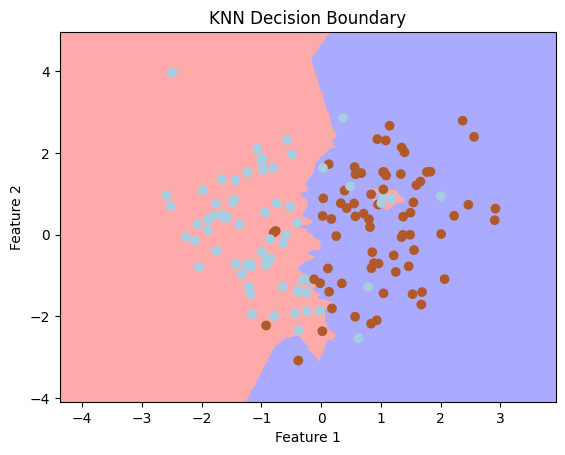

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Generate a synthetic 2D dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN classifier
knn = KNN(k=5)  # You can adjust the value of k
knn.fit(X_train, y_train)

# Create a mesh grid to visualize the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh grid
mesh_predictions = knn.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Create a color map for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Plot the decision boundary
plt.figure()
plt.pcolormesh(xx, yy, mesh_predictions, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("KNN Decision Boundary")
plt.show()